# Классификация и кластеризация
## 1. Классификация

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [86]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
data = pd.DataFrame(iris.data, columns=iris.feature_names).iloc[:,:2]#[['sepal_length', 'sepal_width']]
data_class = iris.target

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [62]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
lda = LinearDiscriminantAnalysis()

In [65]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
# Центроиды
lda.means_

array([[5.01142857, 3.44571429],
       [5.9475    , 2.7675    ],
       [6.49459459, 2.96756757]])

In [67]:
# делаем прогноз на тестовой выборке
classes = lda.predict(X_test)
classes

array([2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1])

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
# Точность предсказания
accuracy_score(y_test, classes)

0.868421052631579

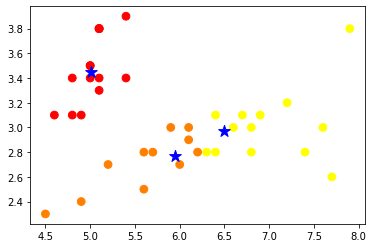

In [70]:
# тестовые данные с предсказанными классами
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], cmap='autumn', c=classes, s=60)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='blue', s=150, marker='*')

## 2. Кластеризация

In [96]:
# Нормализуем данные (в данном случае это не играет особой роли)
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
scaled_data = scaler.fit_transform(data)

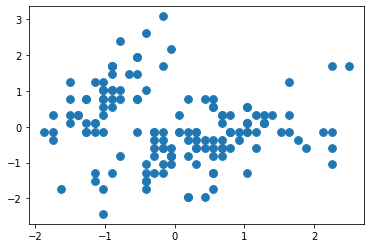

In [99]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],cmap='autumn', s=60)

In [100]:
from sklearn.cluster import KMeans

Попробуем подобрать количество кластеров по методу локтя

In [101]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled_data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

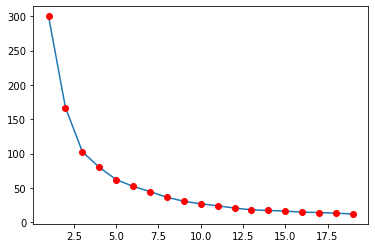

In [102]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Как видно по графику, после числа кластеров равного 5, существенного снижения инерции не наблюдается. Поэтому будем исследовать кластеризацию данных методом kmeans исходя из этого числа кластеров.

In [103]:
kmeans = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(scaled_data)
clusters

array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       4, 1, 4, 1, 4, 1, 0, 0, 0, 3, 2, 2, 0, 3, 0, 3, 3, 2, 3, 2, 2, 0,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 0, 0, 3,
       2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 3, 0, 2, 0,
       0, 2, 0, 3, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

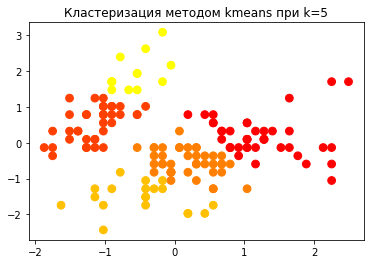

In [104]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], cmap='autumn', c=clusters, s=60)
plt.title('Кластеризация методом kmeans при k=5')

Из графика видно, что при k=5 наблюдается большое количество пограничных точек. Кроме того, в описании данных сказано, что в них наблюдается 3 класса (растений) с равным количеством объектов в каждом. Поэтому рассмотрим вариант при k=3.

In [105]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(scaled_data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [106]:
from collections import Counter
print(Counter(clusters))

Counter({2: 57, 0: 50, 1: 43})


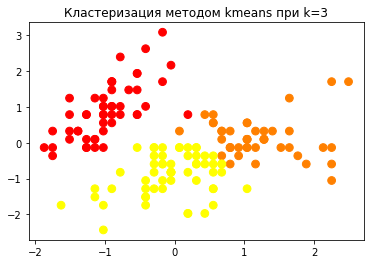

In [107]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], cmap='autumn', c=clusters, s=60)
plt.title('Кластеризация методом kmeans при k=3')

При k=3 наблюдается более явное разделение на кластеры, т.к. в этом случае у кластеров меньше пограничных точек.
К тому же, зная, что в данных содержится информация об объектах 3-х классов, возможно, кластеризация поможет увидеть различия между данными классами.
Будем считать разделение на 3 кластера наиболее оптимальным (и информативным).